# Lesson 3

### 1

In [4]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 2

In [16]:
num_sec_june = 86400*30
print("The number of seconds in the month of June is:", num_sec_june)
june_aug = num_sec_june - 43200 + 31*86400 + 13*86400 + 9*60*60 + 30*60
print("The number of seconds that elapsed from June 1 at 1200 to August 14 at 0930 is:", june_aug)

The number of seconds in the month of June is: 2592000
The number of seconds that elapsed from June 1 at 1200 to August 14 at 0930 is: 6384600


### 3

In [12]:
pop = Table.read_table('world_population.csv')

In [13]:
print("Population in 2015:", pop.take(65).column("Population")[0])

Population in 2015: 7256490011


In [14]:
pop1950 = int(pop.take(0).column("Population")[0])
pop2015 = int(pop.take(65).column("Population")[0])
growth = pop2015-pop1950
print("The growth from 1950 to 2015 is: ", growth)

The growth from 1950 to 2015 is:  4698861357


In [64]:
avg = ((pop2015/pop1950)**(1/65))
print("The average growth rate over this time was: ", avg, "%")

The average growth rate over this time was:  1.0161727038065897 %


### 4

In [5]:
titanic = Table.read_table('Titanic_Kidz.csv')
titanic.show(1)
# The table edits were completed in Excel for simplicity.

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1


passenger_class,count
1,216
2,184
3,491


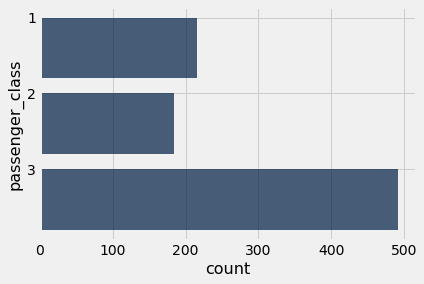

In [9]:
bar_data = titanic.group(['passenger_class'])
bar_data.barh('passenger_class','count')
bar_data


In [188]:
age_list = titanic.sort('Age')
age_list.show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C,1
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S,2
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C,3
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C,3
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S,2


In [44]:
age_list = titanic.sort('Age', descending = True)
#age_list.show(5)

In [48]:
old = age_list.exclude[:177]
# ages.show(177)

old.show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,0
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S,0
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C,0
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,0
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q,0


In [62]:
surv_rates = titanic.groups(["Survived","passenger_class"])
# titanic.barh("passenger_class","Survived")
surv_rates.show()
print("Survival rate for passenger_class 1:",(surv_rates[2][3]/((surv_rates[2][0])+surv_rates[2][3]))*100,"%")
print("Survival rate for passenger_class 2:",(surv_rates[2][4]/((surv_rates[2][1])+surv_rates[2][4]))*100,"%")
print("Survival rate for passenger_class 3:",(surv_rates[2][5]/((surv_rates[2][2])+surv_rates[2][5]))*100,"%")



Survived,passenger_class,count
0,1,80
0,2,97
0,3,372
1,1,136
1,2,87
1,3,119


Survival rate for passenger_class 1: 62.96296296296296 %
Survival rate for passenger_class 2: 47.28260869565217 %
Survival rate for passenger_class 3: 24.236252545824847 %


# DIY Study

### What percentage of men / women survived?

In [61]:
gender = titanic.groups(["Sex","Survived"])
gender.show()
men_surv = gender[2][3]
men_tot = gender[2][2]+men_surv
women_surv = gender[2][1]
women_tot = gender[2][0]+women_surv
print("Survival rate for men:",(men_surv/men_tot)*100,"%")
print("Survival rate for women:",(women_surv/women_tot)*100,"%")

Sex,Survived,count
female,0,81
female,1,233
male,0,468
male,1,109


Survival rate for men: 18.890814558058924 %
Survival rate for women: 74.20382165605095 %


### What percentage of children / adults survived? (adult is 18+)

In [215]:
ages = titanic.sort("Age",descending=False)
children = 0
for i in range(0,titanic.num_rows):
    if ages[5][i]<18:
        children = children +1
child_surv = 0
for j in range(0,children):
    if ages[1][j] == 1:
        child_surv = child_surv+1
print("Total Children:",children)
print("Survived:",child_surv)
print("Suvival Rate:",(child_surv/children)*100,"%")

ages = titanic.sort("Age",descending=False)
adults = 0
for i in range(0,titanic.num_rows):
    if ages[5][i]>=18:
        adults = adults +1
adult_surv = 0
for j in range(0,adults):
    if ages[1][j] == 1:
        adult_surv = adult_surv+1
print()
print("Total Adults:",adults)
print("Survived:",adult_surv)
print("Suvival Rate:",(adult_surv/adults)*100,"%")
print()
print("Overall survival rate:",100*(adult_surv+child_surv)/(adults+children),"%")
print()
print("Passengers not counted: ",titanic.num_rows-adults-children)

Total Children: 113
Survived: 61
Suvival Rate: 53.98230088495575 %

Total Adults: 601
Survived: 247
Suvival Rate: 41.098169717138106 %

Overall survival rate: 43.13725490196079 %

Passengers not counted:  177
